In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(r"sqlite:///C:\Users\sooki\OneDrive\Desktop\Bootcamp Classwork Projects\Week 10 - SQL Alchemy\sqlalchemy_challenge\Starter_Code\Resources\hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute("SELECT max(date) FROM measurement").fetchall()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
preciptation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-24").\
    filter(measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
preciptation_df = pd.DataFrame(preciptation_data).set_index("date")
preciptation_df = preciptation_df.rename(columns = {"prcp":"precipitation"})

# Sort the dataframe by date
preciptation_df = preciptation_df.sort_values(by = "date").dropna()
preciptation_df.head(10)

,precipitation
date,
2016-08-24,2.0
2016-08-24,54.6
2016-08-24,57.9
2016-08-24,54.6
2016-08-24,36.8
2016-08-24,31.0
2016-08-25,2.0
2016-08-25,0.0
2016-08-25,1.5


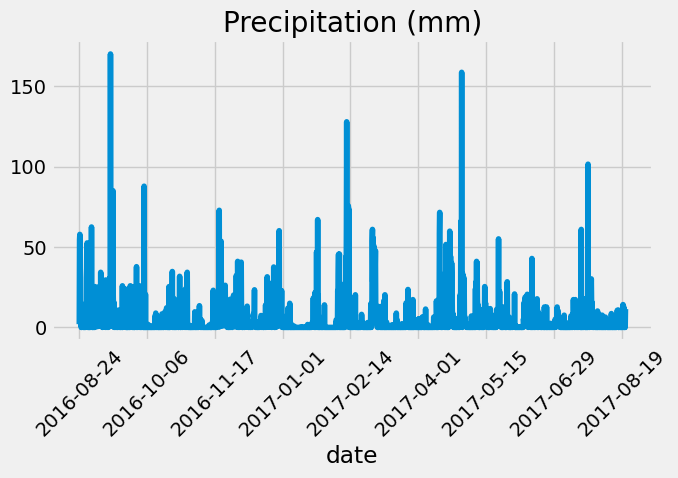

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
preciptation_df.plot(rot = 45, legend = False, figsize = (7, 5))
plt.title("Precipitation (mm)")
plt.tight_layout() 
plt.show
plt.savefig("Image 1")

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
preciptation_df.describe()

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count() 
print(f"The total number of stations in the dataset is {station_count}.")

The total number of stations in the dataset is 9.


In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = "USC00519281"
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs), 
              func.avg(measurement.tobs)).filter(measurement.station == station_id).all()


[(12.2, 29.4, 22.03582251082252)]

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_results = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.date >= "2016-08-24").\
                        filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == "USC00519281").all()

# Create a DataFrame from the query results
USC00519281_results_df = pd.DataFrame(USC00519281_results, columns=["date", "tobs"])
USC00519281_results_df.head()


,date,tobs
0,2016-08-24,25.0
1,2016-08-25,26.7
2,2016-08-26,26.7
3,2016-08-27,23.9
4,2016-08-28,22.8


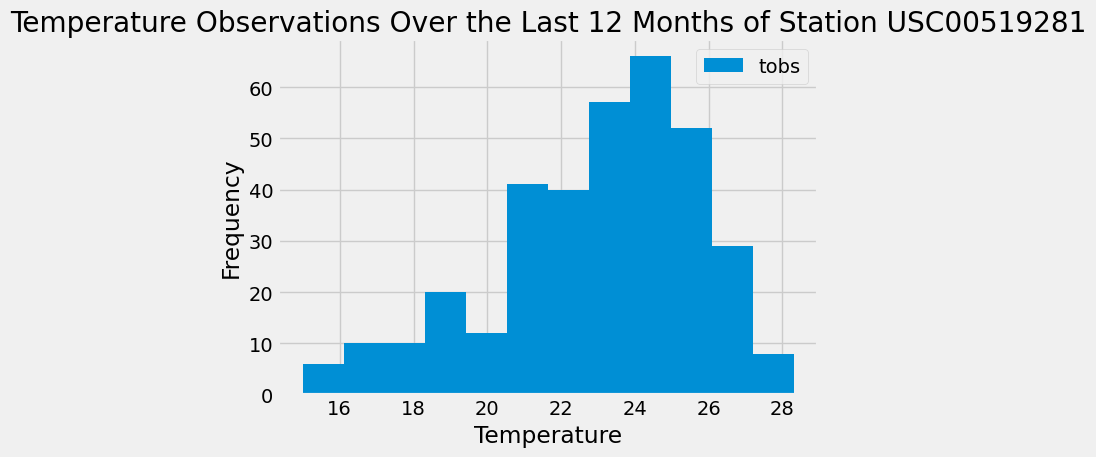

In [50]:
# Histogram
USC00519281_results_df.plot.hist(bins=12)
plt.title("Temperature Observations Over the Last 12 Months of Station USC00519281")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show
plt.savefig("Image 2")

# Close Session

In [47]:
# Close Session
session.close()